<a href="https://colab.research.google.com/github/yijiawoofwoof/requests/blob/master/linreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Linear Regression

#### Adapted from Data and Decisions regression handouts for Python, by Mohsen Bayati

<hr>

First importing some necessary libraries.

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import statsmodels.formula.api as smf
from scipy.stats import norm





## 1. Simple regression as describing a pattern in the data


We imagine that we have a scatter of $n$ points $(X_i, Y_i)$ for $i=1,2, \ldots$ and, in an attempt to describe how the points covary or
correlate, we try to find the line
$$Y=a+bX$$
that "most closely"
conforms to the scatter of points.  Regression finds the slope and
intercept that make the "sum of squared deviations" around the
regression line,
$$
\sum_{\text{data points}} (\text{actual} - \text{predicted})^2
$$
as small as possible.  In mathematical terms, regression finds the pair
of constants $a$ and $b$ that minimize the sum
$$
\sum_{i=1}^n
\left[Y_i-(a+bX_i)\right]^2\,.
$$
A measure of how well this line does in fitting the data is called the
*coefficient of determination*, or $R^2$ (read R-squared) for
short.  $R^2$ is interpreted as the proportion of variation in the $Y$
values that is explained by the regression line.  If all the points
lie along a single line, $R^2$ will be one (unless the $Y$ values are
constant -- in which case $R^2$ is undefined).  If the best line we
can find is perfectly flat, so none of the variation in $Y$ is
explained by the line, then $R^2$ is zero.

## 2. Regression in Python

We can build a regression model in Python using the `ols` command from `statsmodels.formula.api` package. First, we can load a data set containing
52 weeks of demand and price information for a major coffee producer in Cypress. This can be done by the following command

In [ ]:
coffee = pd.read_csv("https://raw.githubusercontent.com/mohsenbayati/oit367/main/data/Cypress.csv")

and now we inspect the top rows

In [ ]:
coffee.head()

,Week,Demand,PricePerKg,Summer,Winter,CompetitorsPrice,Advertising
0,1,395.79,9.0,0,0,9.0,500
1,2,570.90,9.0,0,0,9.0,500
2,3,490.97,9.0,0,0,9.0,500
3,4,489.21,9.0,1,0,9.0,0
4,5,469.25,9.9,1,0,9.0,0


Next we will use the following command to regress `Demand` on `PricePerKg`.

In [ ]:
reg_setup = smf.ols(formula = 'Demand~PricePerKg', data = coffee)
model = reg_setup.fit()

In order to see the details of the regression model we can use the command `model.summary()` and the result is shown below.

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Demand   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     1.992
Date:                Wed, 07 Jan 2026   Prob (F-statistic):              0.164
Time:                        11:37:17   Log-Likelihood:                -286.27
No. Observations:                  52   AIC:                             576.5
Df Residuals:                      50   BIC:                             580.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    636.5048    122.034      5.216      0.0

In class we will discuss the results in more details.


**Remark (linear regression by sklearn package):** There is an alternative package to perform linear regression in python, as part of the general machine learning package. `sklearn`. Specifically, the python function `sklearn.linear_model.LinearRegression()`. We will showcase the use of this package in the future. If one is interested in their differences, a high-level comparision is as follows: `smf.ols()` brings similar functionalitys as the R version of linear regression `lm`. However, `sklearn.linear_model.LinearRegression()` is part of a general family of machine learning packages in python that all have very similar syntax. Therefore, if one is aiming to use linear regression for prediction purposes, with code sytanx in the unified format of `sklearn`, then
`sklearn.linear_model.LinearRegression()` should be used. Otherwise, `smf.ols()` is better, given the detailed output as shown above.

## 3. Statistical Inference in a Simple Regression

### 3.1. Setting

We have observations of two variables, $Y$, the dependent variable,
and $X$,the independent variable.  Specifically, we have $n$
observations, and we write $(Y_i, X_i)$ for the $i$th pair of numbers.

We imagine that
$$Y_i=\alpha+\beta X_i+\varepsilon_i$$
where $\alpha$
and $\beta$ are constants, and $\varepsilon$ is an
observation-specific "chance error" term -- which we usually assume
is Normally distributed with mean zero and some (unknown) variance
$\sigma^2$.

**Remark**: The Normality of the chance error term is not
really essential unless we are interested in confidence intervals
around forecasts; for all other purposes, as long as the sample is
large enough, the central limit theorem says that most of what follows is approximately true.

Our problem is that we don't know $\alpha$, $\beta$ or $\sigma^{2}$. So we will use the data sample to estimate and make inferences about these variables.


### 3.2 Estimates from the regression

The estimates we compute for $\alpha$ and $\beta$ are the same
regression coefficients $\hat\alpha$ and $\hat\beta$ that minimize the sum of squared
deviations in the sample.  It turns out that the formulae
that give $\hat\alpha$ and $\hat\beta$ from the data are (very good) unbiased
estimators of $\alpha$ and $\beta$: On average (meaning, averaging
across results from sample to sample), the numbers we compute for $\hat\alpha$ and $\hat\beta$ are equal to the true (unknown) values $\alpha$ and $\beta$.
In the output of Cypress coffee resgression (shown above) $\hat\alpha=636.50$
and $\hat\beta = -19.04$. Next we calculate the Mean Squared Error (MSE) and the Root Mean Squared Error (RMSE).


In [ ]:
MSE = (model.resid**2).sum()/(len(model.resid))
RMSE = np.sqrt(MSE)
print('Mean Squared Error (MSE) is: ', MSE)
print('Root Mean Squared Error (RMSE) is: ', RMSE)

Mean Squared Error (MSE) is:  3541.5710616454285
Root Mean Squared Error (RMSE) is:  59.51110032292655


In other words, MSE is the mean square error of the regression, which is the sum of the squares of the deviations, divided by the number of points in the sample. Furthermore, RMSE is the square root of this value, which simply is the *average prediction error* of the regression.

Note that as we observe later, usually RMSE on the data used for building the regression model (training data) is less important than RMSE calculated on a separate data set (validation data). Since, it is the latter RMSE that shows whether the regression model is generalizable. We will discuss this in class. Be sure you know where to find $\hat\alpha$, $\hat\beta$, and RMSE in the code above, and how to interpret them.

**Remark:** In some software like Excel, the mean square error is computed by dividing by $n-2$ (or generally degrees of freedom of residuals) rather than $n$, a convention statisticians prefer to obtain a property called *unbiasedness* of the variance estimate.  In applications with any reasonable sample size, however, the use of $n$ versus $n-2$ makes little difference. If you are interested to find this adjusted MSE value you can simply use ``mse_resid`` method within statsmodels. As a sanity check, we have also calculated this value by simply dividing the total error by $n-2$ rather than $n$.

In [ ]:
adjusted_MSE = model.mse_resid
print('Adjusted MSE is: ', adjusted_MSE)
adjusted_MSE_2 = (model.resid**2).sum()/(len(model.resid)-2)
print('Adjusted MSE (second way) is: ', adjusted_MSE_2)

Adjusted MSE is:  3683.233904111247
Adjusted MSE (second way) is:  3683.2339041112455


As you observe, the difference is pretty small. So, it is fine to use any of these formulas to estiamte MSE or its root, i.e., RMSE.



### 3.3 Standard errors of $\hat\alpha$ and $\hat\beta$

Because our sample is random, the estimates $\hat\alpha$ and $\hat\beta$ of $\alpha$ and
$\beta$ that we compute in a regression are random.  Sometimes they will
be bigger than the constants they are meant to estimate, and sometimes
less.

Of course, the expected value (mean) of $\hat\alpha$ is $\alpha$, and that of $\hat\beta$
is $\beta$; this is what it means that $\hat\alpha$ and $\hat\beta$ are unbiased
estimates of $\alpha$ and $\beta$.

But there will be some random variation in these estimates, and just
as we discussed the standard deviation of the estimator $\bar{X}$, we
discuss and use the standard deviations of $\hat\alpha$ and $\hat\beta$.  If we knew
$\sigma^2$ (and the particular values of $X$ that we have to work
with), we could write out precise expressions for these standard
deviations.  But since we don't know $\sigma^2$, we work with $s^2$
as an estimate, and compute  *standard errors* for $\hat\alpha$ and $\hat\beta$.
(This is entirely analogous to our previous use of $s_X$ as an estimate of the standard deviation of $X$, and
$$
\frac{\mathrm{SD}(x)}{\sqrt{n}}
$$ as an estimate of the standard error
of $\bar{X}$, and
$$
\sqrt{ \frac{\mathrm{SD}(x)^2}{n_X}+\frac{\mathrm{SD}(y)^2}{n_Y} }
$$
as an estimate of the standard
error for the difference in averages $\bar{X} -\bar{Y}$.)

There are formulae for the standard errors for $\hat\alpha$ and $\hat\beta$, but in the
multiple regression case they require matrix algebra to obtain and are
a bit beyond the scope of this course.  You needn't bother with the
formulae themselves, however.  Instead, you should understand what
they are (estimates of the standard deviations of the random estimates
$\hat\alpha$ and $\hat\beta$ of $\alpha$ and $\beta$), where to find them in python
output, and what can be done with them (for which read on). For example, in the case of Cypress coffee regression output, SE$(\hat\alpha)=122.03$ and SE$(\hat\beta)=13.49$.

### 3.4 Confidence intervals around $\hat\alpha$ and $\hat\beta$

The above values of standard errors for $\hat\alpha$ and $\hat\beta$can be used to compute confidence intervals around
the estimates.  This is analogous to how we constructed
95% confidence intervals for life expectancy in Lecture 1. If the basic model
$$Y = \alpha +\beta X +\text{chance error}$$
is correct, then 95% of all intervals computed as $\hat\beta \pm 2\text{SE}(\beta)$ will contain the true slope $\beta$, and similarly with $\hat\alpha \pm 2\text{SE}(\hat\alpha)$ for $\alpha$ (a more accurate way is to use 1.96 instead of 2, but the difference is usually negligible). As before, these confidence intervals are based
on the 95% rule using a normal approximation to the distribution of
the random variables $\hat\alpha$ and $\hat\beta$; in small samples, this can be
questionable but as $n$ becomes large the central limit theorem
usually justifies our probabilities.  You needn't be concerned about
the details of constructing other types of confidence intervals.  Just
understand what these things mean (and what they don't).


### 3.5 Testing for values for $\alpha$ and $\beta$

The standard errors for $\hat\alpha$ and $\hat\beta$ are also used to test hypotheses
concerning $\alpha$ and $\beta$ such as
*Is $\alpha$ significantly different from zero?* and
*Is $\beta$ significantly greater than zero?*  The usual techniques apply: You find the relevant $t$-statistic under the null hypothesis, and see how far out in its distribution (under the null) the observed value of $\hat\alpha$ or $\hat\beta$ lies.


If we want to test, say, whether $\beta = 0$, the appropriate $t$-statistic to look at is
$$
\frac{\hat\beta}{\mathrm{SE}(\hat\beta)}\,.
$$
Python does this calculation for us. If you for example look at the output of Cypress coffee regression, it shows $t$ value of $-1.412$. Now, as a sanity check, we can also calculate this manually
$$
t=\frac{\hat\beta}{\mathrm{SE}(\hat\beta)}=\frac{-19.04}{13.49}=-1.411416\,.
$$

We can, now use `t.cdf()` or `norm.cdf()` (accurate for $n\geq 30$) from `scipy.stats` library or Normal tables to find the just-significant probability (the $p$-value), one-sided or two-sided, as we like.  Again, Python does this for you automatically, giving you (against a null hypotheses that $\alpha = 0$ and $\beta = 0$), the $p$-values for a two-sided test. In Cypress coffee regression these valus are $3.51\times 10^{-6}$ and $0.164$ respectively.

It is not unlikely that someday you will have occasion to test a null
hypothesis of $\beta$ = some value other than zero.  For example,
suppose you have data on employee performance and amount of in-house
training given to those employees.  You run a regression of Performance
against Weeks of in-house training, and you find that more training
seems to lead to better (higher) performance.  In fact, you find that
the relationship is statistically significant; it is very unlikely that
you would see the data you saw if in-house training had no impact on
performance.

That, however, isn't the point.  In-house training is expensive, and what
you would like to know is whether in-house training sufficiently
increases performance to be worth its cost.  In such a case, you would
want to test a null hypothesis that $\beta$ (the true return to an extra
week of in-house training in terms of performance) is some level (that
makes training economically worthwhile).

In such cases, you will have to form your own hypothesis test; Python
only tests against $\alpha = 0$ and $\beta = 0$.  But the test is
simple.  Suppose, for Cypress coffee regression your null hypothesis is $\beta = -10$. You form the
$t$-statistic
$$
\frac{\hat\beta-\beta}{\mathrm{SE}(\hat\beta)} = \frac{-19.04 - (-10)}{13.49}=-0.7034841
$$
with a coffesponding $p$-value equal to


In [ ]:
p_value = 2*norm.cdf(-0.7034841)
print('p-value is equal to',p_value)

p-value is equal to 0.48175411213101915


### 3.6 Forecasting/Prediction

We can also use a regression to create a prediction, or forecast, for
the value of $Y$ that will correspond to some new value of $X$.  If
our data give regression estimates of $\hat\alpha$ and $\hat\beta$, our estimate of the
value of $Y$ that will go with some new value of $X$ is (of course)
$$
\hat{Y} = \hat\alpha+\hat\beta X
$$
or just the value along the regression line. In Python this can be done using the `predict` function. We will demonstrate this to you in class.

This forecast is based on the regression estimates, and potentially
subject to *forecast error*.  How much error is typical?  For
this, we compute a standard error of the forecast, written as
$\text{SE}(\hat{Y})$, and as discussed before, it is very close to RMSE (when $n$ is large).

We use it to create a confidence interval around our point forecast.
Note that the size of the standard error of the forecast,
$\text{SE}(\hat{Y})$ is larger the further from $\bar{X}$ is the value $X$
that we are computing a forecast for.  This is because the further
from $\bar{X}$ is $X$, the greater will loom any errors we are making
in our forecast.  This is an important point: the error likely to
arise in a forecast at some value of $X$ increases (at an increasing
rate) as $X$ moves away from its average value in the data.  Assuming
the model is built sensibly, the $\text{SE}(\hat{Y})$ tells us
by how much the typical forecast error increases.

You should be clear on this point, and on how to use this formula to
construct a confidence interval for a forecast (using, e.g., the usual
2-$\text{SE}$ rule) in a simple regression.

## 4. Common pitfalls in the use of regression

We will now discuss some of the most important pitfalls that arise in
the use of regression.

### 4.1 Causation vs. Correlation

Simple regression tells you how the dependent and the independent
variables are related.  Sometimes, however, knowing this relation will
not be of much use to you and may even be misleading.  To see why,
consider the following example.

A manager of a car insurance company wishes to determine whether car
anti-theft systems significantly reduce the probability of theft (if
they do he may offer a discount to customers whose cars are equipped
with such systems.) For this purpose he consults the company records.
He randomly chooses a sample of 100 cars and collects information on
whether they were stolen in the past five years and whether they had an
anti-theft system.  He then defines the independent variable
`AntiTheft` and the dependent variable `Theft` as follows.  For a
given car `AntiTheft` is $1$ if the car had an anti-theft system and $0$
if not and `Theft` is $1$ if the car was stolen in the past five years
and $0$ if not.  Regressing `Theft` on `AntiTheft` he is very
surprised to discover that the coefficient is positive, i.e.  if a car
had an anti-theft system it was more likely to have been stolen! He
wonders whether to recommend to his customers not to install anti-theft
systems and in the case they do to charge them higher premia.

So what has gone wrong? Regression told the manager correctly that cars
with anti-theft systems are more likely to be stolen.  The reason for
this fact is that higher quality cars are generally equipped with
anti-theft systems but also appeal more to thieves.  The manager,
however, is not so interested in knowing this fact.  He is rather
interested in knowing by how much the installation of an anti-theft
system on a car of a *given* quality will affect the probability of
the car being stolen.

The important conclusion that emerges is that when interpreting a
regression result you should think whether this result answers the
question you are interested in or whether it simply expresses some
statistical correlation that is of no interest to you.  A regression is not capable of discerning cause and effect
between two variables (if there are omitted variables); there is something you have to bring to the problem. In this case, regression has picked up a *spurious relationship*: both `AntiTheft` and `Theft` are being driven
by another attribute that was left out of the regression, namely, the
quality of the vehicle.

How could one pick up on this problem, from a statistical perspective?
One procedure would be to pick a subsample of cars of a given quality,
then run a difference in means test between the percentage of cars
with anti-theft systems that have been stolen and the percentage of
cars without anti-theft systems that have been stolen.  Very shortly,
we will see a second way to proceed when discussing multiple
regression; we could introduce the "omitted variable" `Quality`
and run a regression of `Theft` on both `AntiTheft` and `Quality`, using the whole sample.

**Conclusion** If all potential confounding factors (omitted variables) are controlled for in the regression, then one can estimate the causal effect of a treatment.


### 4.2  Nonlinear relationships in the data

Regression supposes that the relationship between $X$ and $Y$ is linear
and can give you some fairly misleading results if you estimate a
relationship that in fact is nonlinear.  Therefore if you have a good
reason to believe that a relationship is nonlinear (and there are many
such relationships in the real world) you should not run a linear
regression.  When discussing multiple regression we will see a way to
estimate nonlinear relationships but for the moment let's go over an
example that illustrates the problems of using linear regression to
estimate a non-linear relationship.

Suppose that you had to forecast weekly production costs of
a manufacturing company, based on the output of its production line.
It seems clear that there is
relationship between output and cost of production, and so it would
be natural to collect data on both for a
number of weeks. Data of this ilk is shown below.

In [ ]:
prodData = pd.read_csv('https://raw.githubusercontent.com/mohsenbayati/oit367/main/data/WeeklyProd.csv')
prodData.head()

,ProductionCost,Output
0,1371.035673,71.280981
1,1389.734017,118.887075
2,1361.066250,70.835091
3,1429.442714,114.592596
4,1428.061247,134.430194


The first column
gives production costs in thousands of dollars, and the second column gives the
output in 1000 units.

It might seem natural to regress cost against output, to see
what relationship emerges, and then to forecast cost on a given week
given the relationship you find. The results of the regression using
these data are shown below.

In [ ]:
reg_setup = smf.ols(formula = 'ProductionCost ~ Output', data = prodData)
model= reg_setup.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         ProductionCost   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     78.28
Date:                Wed, 07 Jan 2026   Prob (F-statistic):           1.19e-11
Time:                        11:37:17   Log-Likelihood:                -248.54
No. Observations:                  50   AIC:                             501.1
Df Residuals:                      48   BIC:                             504.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1294.5358     10.357    124.996      0.0

We have an R-squared of 0.6199 -- the
regression line explains around 62 percent of the variation in weekly
production cost -- and a relationship that says that cost of increasing the output by 1000
units is predicted to be around $\$978$. In
particular, if we forecast for a weekly output of $100,000$ units, we forecast
the cost to be around $\$1,392,377$, with a standard error around $\$35,590$.

But if we plot the production data, we might get a bit worried about
the regression and the forecast. The scatter plot is shown below
, and we note that for the few weeks with little output that we have seen, cost was quite low.

Text(0, 0.5, 'Production cost ($000)')

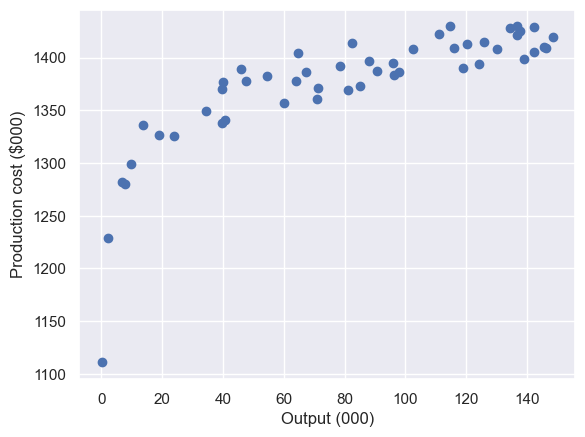

In [ ]:
plt.scatter(prodData['Output'],prodData['ProductionCost'])
plt.xlabel('Output (000)')
plt.ylabel('Production cost ($000)')

If we plot the
residuals against the predictor variablewe see this
more clearly - the regression produces residuals with downward bowl
shape.

Text(0, 0.5, 'RegressionResiduals ($000)')

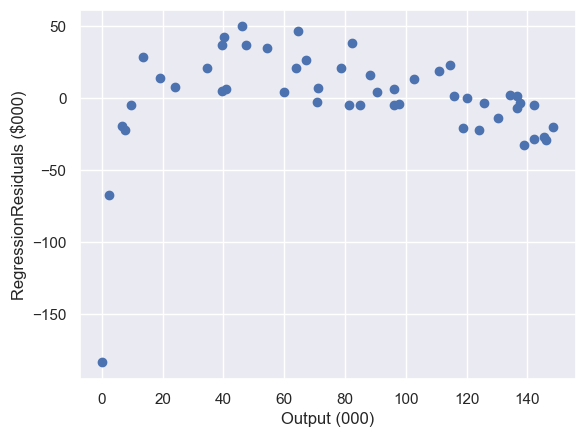

In [ ]:
prodData['RegressionResiduals'] = model.resid
plt.scatter(prodData['Output'],prodData['RegressionResiduals'])
plt.xlabel('Output (000)')
plt.ylabel('RegressionResiduals ($000)')

Of course anyone familiar with the industry would not be misled by the
regression.  It would be clear that cost vs. output has
an inverted bowl shape -- low for low output, high for intermediate
output and high (again) for high output.

### 4.3 Out-of-population forecasting

Let's say that you are a marketing manager for a car manufacturing
company.  You are responsible for sales in two regions $A$ and $B$ and
you want to make sales forecasts for the coming year.  You believe that
the most important factor determining sales is income per person.
Information on sales and income for the past 15 years is more readily
available for region $A$ so you decide to estimate the relation between
sales and income using this information and then to use current income
for each region to forecast sales.

The problem with this procedure is that you will get a misleading
forecast for region $B$ (your forecast for region $A$ will be fine,
although of course you should introduce more variables).  What I mean by
a misleading forecast is that the confidence interval around your
estimate for region $B$ sales will be too narrow making you feel much
more certain about your estimate than you should be.  Maybe inhabitants
of region $B$ depend more on public transportation than those of region
$A$ and their demand is smaller and less sensitive to income.  This and
probably other differences between regions $A$ and $B$ should make you
put less weight on your confidence interval and feel more uncertain
about your estimate.  You will get a good forecast only if regions $A$
and $B$ are pretty similar, but you should otherwise be cautious in
extrapolating regression results.

We will see, how the use of *Training* vs *Validation* or *Test* data can help managing this challenge.

## 5. Multiple Regression

In a (multiple) linear regression, you have a dependent variable $Y$ and
$k$ independent variables $X_1$ through $X_k$, and you hypothesize that
the statistical relationship between them takes the form

$$Y = \beta_0 +
\beta_1 X_1 + \ldots \beta_k X_k + \hbox{chance error}.$$

Armed with a
finite set of data (a set of observations on $(Y,X_1,\ldots,X_k)$),
regression produces for you estimates $a, b_1, b_2,\ldots,b_k$ of the
coefficients $\beta_0,\beta_1,\ldots,\beta_k$, as well as an estimate of the standard
deviation of the error term.  It also produces standard errors of the
various coefficient estimates so you can construct confidence
intervals or test hypotheses concerning those coefficients, and it
allows you to forecast the value of $Y$ that will correspond to a
fresh vector of $X$s.

This is all very nice, but there still seem to be some things that linear
regression cannot do.  All variables have to be numbers and there seems
to be no way to deal with categorical data (for instance data on a
person's sex or occupation).  Moreover, the linearity of the model seems
to preclude (i) a nonlinear relationship between an independent variable
and the dependent variable and (ii) interaction effects, i.e.
situations where the effect of an independent variable on the dependent
variable depends on the value of another independent variable.

Fortunately there are techniques for dealing with these situations in
the context of linear regression.  These techniques are (i) dummy
variables, (ii) nonlinear transformations of the independent variables
and (iii) interaction terms.

The main way to capture a nonlinear relationship between an
independent variable $X$ and the dependent variable is to create
nonlinear transformations of $X$ (like $X^2$ or $1/X$ or $\log(X)$) and
include them in the regression.  Nonlinear transformations of the
independent variables allow us to extend the linear model to a more
general model of the form

$$Y=\alpha+f_1(X_1)+\ldots+f_k(X_k)$$

for
various classes of functions $f_1$ of $X_1$, $f_2$ of $X_2$ and so on.

The first part of this note deals with the other two techniques: dummy
variables and interaction terms.  As you will see, all three techniques
help you generate a wealth of new variables.  When building a regression
model and having a large number of independent variables however, there
are some important mistakes that you should avoid doing.  The second
part of the note points out these mistakes and gives you some guidelines
for building regression models.

### 5.1 Dummy variables or Binning

When the population splits into two or more segments, and you believe
that membership in one segment or another affects the "intercept" of
the relationship between independent and dependent variables, you may
use dummy variables.

For example, suppose you are looking at real estate prices in two
counties, San Mateo and Santa Clara.  More specifically, suppose you are
trying to explain the price of single-family houses on the basis of
square footage of the house and lot size.  (Serious regression analysis
of single-family house prices would involve a lot more variables, but
this will be enough to make the point.) In employing a linear
regression, you are assuming that the relationship looks like

$$
\text{Price of house} = \beta_0 + \beta_1 \times
\text{feet}^2 + \beta_2\times\text{lot size + chance error.}
$$

But it probably isn't that simple: because of
differences in zoning ordinances, building codes, and county tax rates,
you might think that the intercept $\beta_0$ should be different in the
two counties.

In such a case, you add a *dummy variable*, a third independent
variable that is set equal to zero for each data point that is in Santa
Clara County (say) and is equal to one for each data point in San Mateo.
Then if you run the regression

$$
\text{Price of house} = \beta_0 + \beta_1 \times
\text{feet}^2 + \beta_2\times\text{lot size} + \beta_3\times\text{the dummy + chance error}\,,
$$

you are effectively estimating the
intercept as being $\beta_0$ for Santa Clara County houses and $\beta_0 +\beta_3$ for San Mateo County houses.


What if there is a third county, say Alameda, involved? You should then
create two dummy variables.  The first (the third variable in the list
of independent variables) is $1$ for San Mateo properties and zero for the
others.  The second (the fourth variable in the list of independent
variables) is $1$ for Alameda and zero for the others.  This will then get
you estimates of $\beta_0$ as the intercept for Santa Clara (both dummies
zero), $\beta_0 + \beta_3$ for San Mateo, and $\beta_0 + \beta_4$ for Alameda.

In general, when your data are partitioned according to some
characteristic into $k$ classes, you use $k-1$ dummy variables.  Note
that you do not use $k$ dummies (that is, in the example, we don't add a
third dummy which is $1$ for Santa Clara and zero for the other two).  If
you do this, most regression packages will get very unhappy (for mathematical reasons), and will express that unhappiness by
some means or other.  (Sophisticated regression packages will say
something like "the regressors are linearly dependent" and ask you to
do something to prevent this.  What you should do in such a case is
delete one of the dummy variables.  If this ever happens to you, you probably need to eliminate one or more of your independent variables.)

Two points about dummies:

1. When you put in a dummy variable (or several),
you are effectively allowing the intercept to vary depending on the
group the data point belongs to, but you are insisting on the same
slope/coefficient for other independent variables, and you are insisting
on a pooled estimate for the standard deviation of the residuals.  In
the context of our example, with a dummy for San Mateo, you allow for
different intercepts or average prices for houses in San Mateo and Santa
Clara, but you are still requiring that the marginal value of an extra
square foot of house, $\beta_1$, is the same in the two counties.  If you
want to allow for different slopes on square footage in the two
counties, but insist on equal slopes/coefficients for lot size and/or
pooled estimates for the standard deviations of the residuals, you
should use interaction terms, as discussed below.  If you want to allow
for completely different regression lines, one for Santa Clara and
another for San Mateo, you should simply run two separate regressions.

2. Suppose we have houses in Santa Clara and in San
Mateo, and houses in incorporated and unincorporated parts of each
county.  That is, we have four groups in our data: incorporated Santa
Clara, unincorporated Santa Clara, incorporated San Mateo, and
unincorporated San Mateo.  If you use three dummies (the first: 1 for
incorporated S.C., 0 for the other three categories; the second: 1 for
unincorporated S.C., 0 for others; the third: 1 for incorporated S.M., 0
for others), you will be allowing for a separate intercept value for
each of the four groups.  An alternative *that is not equivalent* is
to have two dummies: the first being 1 for San Mateo and 0 for Santa
Clara; the second being 1 for unincorporated, 0 for incorporated.  This
gives you four different intercept terms, but it forces the difference
between incorporated and unincorporated S.C. to be the same as the
difference between incorporated and unincorporated S.M.  There may be
reasons to force this "same difference" property, in which case you
would want to use the two-dummy approach.  But if there is no reason to
force this, you should use the three-dummy technique.


### 5.2 Interaction effects

As we pointed out in the introduction of this note, nonlinear
transformations of the independent variables allow us to extend the
linear model to a more general model of the form

$$
Y=\beta_0+f_1(X_1)+\ldots+f_k(X_k)
$$

But the model is still restricted
in an important way: the effects of the $X_k$'s on $Y$ are *additive*.  This means, for instance, that the effect of $X_1$ on $Y$
does not depend on whether $X_2$ is high or low. In many applications
however, we might be inclined to suppose that one or more of the independent
variables *interact*.

To take an example, empirical research has shown that a manufacturing
firm, by putting in place so-called lean-production or Kanban-style
manufacturing systems can improve its unit costs (after a while).
Empirical research has also shown that manufacturing firms can improve
unit costs by an array of policies designed to increase worker
commitment to the firm, such as employment guarantees, job enrichment
and substantial cross-training. What is perhaps more interesting is that
the two arrays of policies interact positively: If putting in place a
lean-production system improves unit costs by 25% after a year, and
high-commitment HRM (human resource management) policies improve unit
costs by 15%, the a combination of the two gives improvements of more
than the sum of the two -- improvements of 50% might be seen.

**Remark:** These are *not* right numbers; they are used only for illustrative
purposes. You may discuss this in other courses (e.g., HRM); watch for the article by MacDuffie and Kraftchik.

This is an example of two complementary effects, where the whole is
greater than the sum of its parts. There are also well-known examples of
supplementary effects, e.g. increasing worker productivity by
intrusive monitoring "gets in the way"" of increases in worker
productivity by worker empowerment (and vice versa).

Because a linear regression suppose additive effects, it does not seem
to be a tool that can be used to study interaction effects. But there
are various tricks that can be employed, which allow for interaction
effects to be studied.

#### Creating a new independent variable

One trick that sometimes works when you suspect that two variables have
an interaction effect is to create a third independent variable which is
the product of the two. That is if we have three independent variables
and we think variables $X_1$ and $X_3$ will interact, we look at the
regression

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2
+ \beta_3 X_3 + \gamma X_1 \times X_3 + \text{chance error}
$$

In practice, we do this by taking a data-sheet with columns
for $Y, X_1, X_2$ and $X_3$ and creating a fifth column with
$X_1 \times X_3$. Then when we regress, we specify the fifth column as an extra independent variable. Some software packages (such as R), allowe easier ways of doing this. You would just need to write down the interaction term in the formula that is provided to `slf.ols` command. We will show you this in class.

When we do this, if the coefficient estimating $\gamma$ comes out
positive (and significant), we are documenting a positive interaction
effect; raising $X_1$ increases the (positive) impact of a simultaneous
rise in $X_3$ and vice versa. If the coefficient estimating $\gamma$
comes out negative, we  have a negative interaction between $X_1$ and
$X_3$, at least insofar the impact on $Y$ is concerned.

Of course the functional form $X_1 \times X_3$ is very special.  There
are all sorts of functional forms for an interaction between $X_1$ and
$X_3$ and there is no reason a priori to think that a simple product is
best.  But the product form gets used a lot, for the same reason one
adds the square of a column as an extra independent variable; it is
simple and convenient.  It would be nice to have some *a priori*
guidance on what sort of functional form should be used for the
interaction, and in some cases you will have that a priori guidance.
But when you don't, a simple product is better than no interaction terms
at all if you think it likely that there is some interaction.

To illustrate the use of a product term, we come back to the example of
the previous paragraph on house prices in San Mateo and Santa Clara.
Let's say that we are willing to assume that both average house prices
and the effect of square footage on the price of a house are different
in the two counties (but the effect of lot size and the standard
deviation of the residuals are the same).  We will then create an
additional variable equal to the product of the dummy variable and of
the square footage variable and run the following regression

$$
\text{Price of house} = \beta_0 + \beta_1 \times
\text{feet}^2 + \beta_2\times\text{lot size} + \gamma\text{ dummy}\times\text{feet}^2 +\text{chance error}\,.
$$

This regression allows the effect of square footage to be
different in the two counties.  To see this consider first the effect of
square footage for a Santa Clara house.  The dummy is zero in Santa
Clara as well as the product term.  Therefore the effect of an
additional square foot on the price of the house is $\beta_1$.  For a San
Mateo house things are different however because the product term is
equal to $\text{feet}^2$ (the dummy is one in San Mateo.) Therefore the effect
of an additional square foot is $\beta_1+\gamma$.

#### Partitioning the data and running separate regressions}

A second technique is especially useful when one of the
potentially interacting variables is a 0/1 dummy variable.  Then you can
simply partition your data set into two pieces -- those where the dummy
has the value zero and those where the dummy has the value one -- and
run two separate regressions.  (This will require that you have a
substantial number of observations in each of the two pools.) If you
think there is an interaction between you dummy variable and some other
variable, this will turn up if the regression coefficients on the second
variable come out (significantly) different in the two separated
regressions.

Coming back to the example on house prices, if we want to allow for
completely different regression lines for San Mateo and Santa Clara
(i.e. different constant terms, effects of footage and lot size and
standard deviations of the residuals) we just run two separate
regressions.

Which technique should you choose? (Note well that to have a choice, one
of the interacting variables must be a dummy variable or, more
generally, must take a very small number of different values.) The
choice depends pretty much on what you are willing to assume about the
regression coefficients.  If you believe that there a significant chance
that all coefficients should be different then you should run separate
regressions.  If, in contrast, you believe that it is sensible to impose
some constraints on the coefficients (and on the standard deviation of
the residuals) you should simply introduce interaction terms.

### 5.3 Building a regression model

So far, most of our discussion on regression focused on how to analyze a
*given* regression model.  However a more difficult question sometimes is
how to *build* a regression model.  It may well happen that you are
faced with a long list of variables and want to select only a few to
include in the model.  Even though your initial set of variables may be
limited, you are certainly able to create a much larger set of variables
after reading the first part of this note.

Before you build a regression model you should try to understand as well
as you can the problem that you are studying.  You should determine *on a priori grounds* the most important factors that may explain the
dependent variable and then find the appropriate independent variables
to include.  This step may seem just natural to you, but experience with
regression projects shows that it is often neglected.

Ideally, after this stage you have singled out a small number of
independent variables (compared to the amount of data that you have).
You then use regression to estimate the coefficients of these
independent variables.

Things may not work so well if you are studying a fairly complex problem
and it is difficult to single out a few important independent variables
(an example will soon follow).  In addition, even if you decide on a
small number of independent variables you may be uncertain of the exact
form of the relationship between them and the dependent variable.  For
instance you may believe that there is an important interaction between
two independent variables or that an independent variable has a
nonlinear effect on the dependent variable.  Your problems will
naturally be greater if you have few data.

## 6. The problem of overfitting

So what should you do if you find yourself in this unhappy situation? Let's
first illustrate by an analogy what you should *not* do.

Suppose that a particular very virulent but very rare form of cancer has
been detected.  This form of cancer is so rare that there are only seven
cases reported in medical annals.  Notwithstanding its rarity, a
researcher studies this form of cancer, to see whether some pre-existing
condition (of the patient) might be found that indicates susceptibility
to this form of cancer.

Medical research has not yet singled out a few important factors that
cause cancer (and especially this new form of cancer).  Therefore our
researcher studies many aspects of the medical and personal histories of
the seven victims and makes an exciting discovery.  All seven had large
ear lobes, five of the seven had blue eyes, and of those five, four were
audited by the IRS within three years of contracting the condition.
Thus the researcher reports that blue-eyed individuals with large ear
lobes who have had recent problems with the IRS should seek medical
counsel --- they are at great risk!

Presumably you see through this story.  If you look at any seven people,
you are bound to find some set of common characteristics that they
share, and you are sure to do so if your standards of common stretch to
five out of the seven.  They will have something or things in common.
But this is a matter of random happenstance --- you wouldn't want to
predict that an eighth person with this set of characteristics is any
more at risk for contracting the condition than is an eighth person
without the common characteristics, unless you had some physiological
basis for suspecting that the characteristics are carcinogenic.  Blue
eyes, large ear lobes, and IRS attention, even combined, are probably
not carcinogenic.

The analog of the researcher's procedure in our context (building a
regression model) consists in "trying out" many independent variables
and keeping only the ones that work.  There are many ways to do this.
The most direct way is to literally try out a large number of possible
regressions and choose the combination of independent variables that
produces the highest adjusted R-squared.  But there are also indirect
ways to do this.  For instance one may examine the data before choosing
to include a nonlinear term or an interaction term and include the term
only if the data suggests that the term should be present.

From the point of view of the statistical properties of regression, this
is bad procedure because it invalidates all the confidence intervals and
hypothesis tests that the regression package provides.  All those tests
and confidence intervals assume that you have with a fixed set of
independent variables and you run the regression once.  If instead you
use the data to try out all the independent variables and keep only the
ones that work, the regression package will (falsely) attribute a great
deal of significance in your results.

To come back to
our analogy, if our medical researcher attempted to explain
susceptibility to the new form of cancer by large ear lobes, blue eyes
and IRS attention *only* he would get an impressive adjusted
R-squared.

### 6.1 Adding versus trying out variables

The problem we are trying to avoid is not in adding independent variables to
the model but in trying them out and deleting them if they do not
improve the fit to the data.

When you add independent variables you will always fit better the
dependent variable and increase your R-squared.  At the extreme, if you
have 100 observations in the data set and 99 independent variables (plus
a constant term), you will necessarily explain all the variation in the
dependent variable and your R-squared will be 1.

**Remark:** This is a
mathematical fact and requires all 99 variables to be linearly
independent and independent of the constant vector, something which is
entirely usual in these situations.

Of course, this better "fit"" is to the particular data sample you have.
You won't really be explaining the general relationship between your
independent and dependent variables; you will be finding an explanation
for the specific relationship in your sample.  (This can be seen, for
example, by the fact that the regression coefficients will be highly
sensitive to the specific data sample.  Change one value of the
dependent variable by 1 or 2%, and your coefficients are likely to jump
wildly to very different values.)

However a regression package will not give you misleading results.  It
will penalize you for adding variables by reducing your degrees of
freedom.  While adding another independent variable will almost
inevitably raise your unadjusted R-squared (and can never lower it),
unless the new variable adds significantly to your ability to predict
the dependent variable, adjusted R-squared will fall.

You also are penalized for adding independent variables in terms of
confidence intervals and hypothesis testing about the coefficients.
For one thing, adding an independent variable reduces by one your
degrees of freedom, which widens confidence intervals and lowers
just-significant probabilities.  For a second (and more subtle) thing,
adding an independent variable will tend to increase the standard
errors of your coefficients.

**Remark:** It does this because it will
tend to make the matrix of regressors more nearly singular, in
something like the fashion that highly correlated regressors increases
standard errors.  But this is hard to explain unless you know some
matrix algebra.

The regression package will give you the wrong statistics when you start
deleting variables. It will falsely assume that you did not try out many
variables and that the good fit that you got was not due to luck. Since
you will not be penalized in terms of degrees of freedom, you will get a
high adjusted R-squared and tight confidence intervals.

#### What to do?

So let's say that you are stuck with few data and you believe that a
large number of independent variables (including dummies, nonlinear
transformations and interaction terms) would help in explaining the
dependent variable. How should you use your regression package?

First of all, in such a situation you should not expect to learn much
about the relationship between the dependent and the independent
variables even if you follow very sophisticated statistical procedures.
But at least here is a correct way to use your regression package.

You should randomly split your sample in two halves. You will use the
first half to decide which variables to include and build your model.
After building your model you will estimate/test it on the second half.
*If* you build a model with explanatory power based on the first
subset of your data, it should have a high adjusted R-squared when
applied to the second subset (almost as high on average as on the subset
of data from which it was designed).  If the model you build works well
for the set of data from which it was designed but works noticeably more
poorly for independent copies of data, then you probably have a model
that simply reflects the peculiarities of the data set used to build it.

You should be careful in the first stage of model-building and not
follow the mechanical procedure of maximizing adjusted R-squared.  Even
if you don't know the form of the relationship between dependent and
independent variables, you will probably have some sense of what that
relationship might be and you should guard against the inclusion of
independent variables that do a good job of "explanation" (in the
statistical sense) but otherwise make no sense on the face of things.